# Linear Regression and Gradient Descent

Aims:

* Implement batch gradient descent for a simple linear regression model
* Review matrix dot products with `numpy`
* Simple plots with `matplotlib.pyplot`

You will need to fill in parts that say 
    # INSERT CODE HERE
    
where possible the exercises will indicate the expected output for you to check your work.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data loading

In [3]:
def get_data():
    '''Load data for the exercise.
    
    Returns:
    X : 2d numpy array
    y : 1d numpy array
    '''
    # Loads data from CSV - do not change this !!
    data = np.loadtxt('regression.csv', delimiter=',', skiprows=1)
    X, y = data[:,[1,0]], data[:, 2]
    return X, y

In [4]:
# Get the data. X and y are numpy arrays.
X, y = get_data()

In [5]:
# Return the dimensions of the matrix X in the form (nrows, ncolumns)

X.shape

(5000, 2)

`X` is a two-dimensional array with 5000 rows and 2 columns. In other words, our feature dataset contains 5000 examples and has 2 features.

In [6]:
# Return the dimensions of the matrix y

y.shape

(5000,)

Expected output:

    (5000,)
    
`y` is a one-dimensional array with length 5000. This is our target data - the values we wish to predict.

## 2. Data exploration

Let's begin by taking a look at the first few rows of data.

Hint: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#arrays-indexing

In [7]:
# Print the first 5 rows of X

X[:5]

array([[ 1.        ,  0.32674476],
       [ 1.        ,  2.56008454],
       [ 1.        , -0.61138525],
       [ 1.        , -0.89783007],
       [ 1.        ,  0.63293182]])

Expected output:
    
    array([[ 1.        ,  0.32674476],
           [ 1.        ,  2.56008454],
           [ 1.        , -0.61138525],
           [ 1.        , -0.89783007],
           [ 1.        ,  0.63293182]])

In [8]:
# Print the first 5 rows of y

y[0:5:1]

array([ 14.65056972,  42.12063856,  -7.70932904, -12.49118658,
         8.86824912])

Expected output: 

    array([ 14.65056972,  42.12063856,  -7.70932904, -12.49118658,
             8.86824912])

It is often useful to make some simple plots to visualise the data. We will be using the `matplotlib` library to make our plots.

Hints:
* Slicing with numpy: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#arrays-indexing
* Scatter plots: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
* Histograms: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

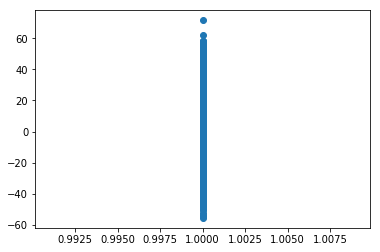

In [9]:
# Make a scatter plot of the first column of X vs y
# You will need to "slice" X to get just the values in the first column
# As a bonus, add some labels to your axes

xvalues = X[::,0]
plt.scatter(xvalues,y)

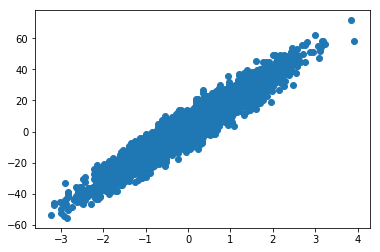

In [10]:
# Make a scatter plot of the second column of X vs y

# INSERT CODE HERE

xvalues = X[::,1]
plt.scatter(xvalues,y)

** Question: Is this dataset appropriate for a linear regression model? Explain. **

**Answer**:

    # INSERT ANSWER HERE
    Yes, there is a clear linear relationship in the second scatter plot

## 2. Defining the model and cost function

### Linear Regression

We will model the data using linear regression.
The predictions $\hat{y}^i$ are given by the linear model

$\hat{y}^i=w_0x^i_0 + w_1x^i_1$.   $\quad\quad\quad(1)$

Notation explained:

* The superscript $i$ denotes the $i$-th example (or row) in the dataset.
* $x_0$ and $x_1$ are the two features (or columns) in `X`
* $w_0$ and $w_1$ are the parameters of the model and indicate the dependence of $\hat{y}$ on $x_0$ and $x_1$, respectively.

**Bias term**

You may have noticed that all the values $x_0^i=1$. In this case, $w_0$ is effectively a bias term and we could write the model as simply

$\hat{y}^i=w_0 + w_1x^i_1$,   $\quad\quad\quad(2)$

but to allow more elegant matrix operations we will state $x^i_0$ explicitly.

Hence, as a matrix dot product, we can write

$\hat{y}=X\cdot\mathbf{w}$,   $\quad\quad\quad(3)$

where $X$ is a matrix with shape `(n samples, n features = 2)` and $\mathbf{w}$ is the weights vector $[w_0, w_1]$.

**Question:** What are the dimensions of $\hat{y}$?

In [11]:
w = np.array([1,2])
dot_prod = np.dot(X,w)
np.shape(dot_prod)

#dimensions of y^ are one dimensional array of length n samples

(5000,)

Define a `predict(X,w)` method that calculates the linear regression model for a given input of X and w.

Hint: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

In [12]:
# Define a function that calculates the linear regression model. This will come in useful later.
def predict(X, w):
    '''The linear regression model as defined in Equation (1).
    It takes X and w as inputs and returns a 1d-array of predictions.

    Parameters:
    X : 2d-array, shape=(n_samples,n_features)
    w : 1d-array, shape=(n_features,)

    Returns:
    ypred : 1d-array, shape=(n_samples,)
    '''
    # Check that the number of features in X is equal to the number features in the weights vector
    assert X.shape[1] == len(w)

    ypred = np.dot(X,w)
    
    # Check that the number of predictions made is equal to the number of samples in X
    assert len(ypred) == X.shape[0]

    return ypred

In [13]:
# Test your function with these example values of w
w = np.array([0.1, 0.7])
predict(X[:5], w)

array([ 0.32872134,  1.89205918, -0.32796967, -0.52848105,  0.54305227])

Expected output:
    
    array([ 0.32872134,  1.89205918, -0.32796967, -0.52848105,  0.54305227])

### Cost function
In order to find the values of $\mathbf{w}$ that best represent the data we need to define a cost function that quantifies how far away our estimate of $\hat{y}$ differs from the true values $y$.

For linear regression the cost function to be minimised is the **RMSE** between the true $y^i$ and predicted $\hat{y}^i$ values:

$J(\mathbf{w})=\frac{1}{2m}\sum^m_{i=1}(\hat{y}^i-y^i)^2$. $\quad\quad\quad(4)$

* We sum the squared error over all samples from $i=1$ to $i=m$, where $m$ is the number of samples in the data.
* The additional multiplication by half $\frac{1}{2}$ compared to a normal RMSE equation is a convention that is there for convenience when we compute gradient descent.

Define a `cost_function(ypred, y)` method that calculates the cost function in Equation (4).

Hint: https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html

In [14]:
def cost_function(ypred, y):
    '''The cost function J(w) as defined in Equation (4).

    Parameters:
    ypred : 1d-array, y values predicted by model 
    y : 1d-array, true y values

    Returns:
    float, J (the cost)
    '''
    # m is the number of samples
    m = len(ypred) # INSERT CODE HERE
    errors = ypred - y
    errors_squared = errors ** 2
    sum_errors = np.sum(errors_squared)
    
    # J is the cost
    J = sum_errors / (2*m)
    # Check that J is a scalar
    assert J.shape == ()

    return J

## 3. Batch Gradient Descent 

The goal of gradient descent is to find the values of $w_0$ and $w_1$ that **minimise** the cost function $J(\mathbf{w})$.

The minimum is found by evaluating the _gradient_ $\frac{dJ}{d\mathbf{w}}$ at a given $\mathbf{w}$ value, and taking a small step, the _learning rate_ $\alpha$, along it.

There are many different gradient descent algorithms. Here we will implement the **batch gradient descent algorithm**. In batch gradient descent, we will use all the examples in the sample at each iteration to update $w_0$ and $w_1$.

The algorithm goes as follows:
1. Initialise $\mathbf{w}=[w_0, w_1]$ with random values.
2. Calculate the gradients $\frac{dJ}{dw_0}$, $\frac{dJ}{dw_1}$ at this point.
3. Update the value of $\mathbf{w}$ using the update equations

  $w_0 := w_0 - \alpha \frac{dJ}{dw_0}$, $\quad\quad\quad(5)$

  $w_1 := w_1 - \alpha \frac{dJ}{dw_1}$. $\quad\quad\quad(6)$
4. Repeat steps 2 and 3 until the change in $\mathbf{w}$ is small.


Let's implement each step in turn.

### Step 1: Initialise w with random values

Hint: https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html

In [109]:
def initialise_w(n_features):
    '''Initialise the weights vector w with random values.

    Parameters:
    n_features : int, number of features 

    Returns:
    w : 1d-array
    '''
    # Set a seed so we get predictable values
    np.random.seed(1)

    w = np.random.rand(2,)
    
    # Check that w has the right shape
    assert w.shape == (n_features,)

    return w

In [110]:
# Test the initialise_w method
w = initialise_w(2)

print('w = [{:.4f},{:.4f}]'.format(w[0], w[1]))

ypred = predict(X, w)
print('yhat[0]={:.4f}'.format(ypred[0]))

cost = cost_function(ypred, y)
#print(cost.shape)
print('Cost={:.4f}'.format(cost))

w = [0.4170,0.7203]
yhat[0]=0.6524
Cost=144.0347


Expected output:
```
w = [0.4170,0.7203]
yhat[0]=0.6524
Cost=144.0347
```

### Step 2: Calculate the gradient of J

Recalling Equations (1) and (4):

$\hat{y}^i=w_0x^i_0 + w_1x^i_1$.   $\quad\quad\quad(1)$

$J(\mathbf{w})=\frac{1}{2m}\sum^m_{i=1}(\hat{y}^i-y^i)^2$. $\quad\quad\quad(4)$

Evaluate the gradients $\frac{dJ}{dw_0}$ and $\frac{dJ}{dw_1}$. You may need some pen and paper for this part.

Implement `calc_dJ/dw0(X, y, w)` and `calc_dJ/dw1(X, y, w)`:

dJ/dw0 = 1/m * SUM((ypred - y)*x0)
dJ/dw1 = 1/m * SUM((ypred - y)*x1)

In [111]:
X[:,1]

array([ 0.32674476,  2.56008454, -0.61138525, ...,  1.08004807,
       -1.28042935,  0.1943843 ])

In [112]:
def calc_dJ_dw0(X, y, w):
    '''Function to calculate dJ/dw0

    Parameters:
    X : 2d-array, feature matrix
    y : 1d-array, true y values
    w : 1d-array, linear regression model weights

    Returns:
    dJ_dw0 : float
    '''
    # Number of samples
    m = len(y) # INSERT CODE HERE
    
    ypred = predict(X,w) # INSERT CODE HERE
    
    dJ_dw0 = ( m ** -1 ) * np.sum( ( ypred - y ) * X[:,0]  )   # INSERT CODE HERE
    
    return dJ_dw0


def calc_dJ_dw1(X, y, w):
    '''Function to calculate dJ/dw1

    Parameters:
    X : 2d-array, feature matrix
    y : 1d-array, true y values
    w : 1d-array, linear regression model weights

    Returns:
    dJ_dw1 : float
    '''
    # Number of samples
    m = len(y) # INSERT CODE HERE
    
    ypred = predict(X,w) # INSERT CODE HERE
    
    dJ_dw1 = ( m ** -1 ) * np.sum( ( ypred - y ) * X[:,1]  )   # INSERT CODE HERE

    return dJ_dw1

In [113]:
# Check the derivatives of J wrt w0 and w1
w = initialise_w(2)
dJ_dw0 = calc_dJ_dw0(X, y, w)
dJ_dw1 = calc_dJ_dw1(X, y, w)

print('dJ/dw0={:.4f}'.format(dJ_dw0))
print('dJ/dw1={:.4f}'.format(dJ_dw1))

dJ/dw0=-2.2698
dJ/dw1=-15.9842


Expected output:
```
dJ/dw0=-2.2698
dJ/dw1=-15.9842
```

A much more elegation solution is to use `np.dot` to perform a matrix multiplication and evaluate $dJ/dw_0$ and $dJ/dw_1$ in a single operation to return the vector 

[$dJ/dw_0$, $dJ/dw_1$]. 

Examine the equations you wrote out for the derivatives and try to implement it:

In [114]:
def calc_dJ_dw(X, y, w):
    '''Function to calculate dJ/dw

    Parameters:
    X : 2d-array, feature matrix
    y : 1d-array, true y values
    w : 1d-array, linear regression model weights

    Returns:
    dJ_dw : 1d-array
    '''
    # Number of samples
    m = len(y)
    
    ypred = predict(X,w)
    
    dJ_dw = ( m ** -1 ) * np.dot(( ypred - y ) , X )  # INSERT CODE HERE

    # Check that dJ_dw has the right shape
    assert dJ_dw.shape == w.shape

    return dJ_dw

In [115]:
# Check the calc_dJ_dw method
dJ_dw = calc_dJ_dw(X, y, w)
print('dJ/dw = [dJ/dw_0, dJ/dw_1] =', dJ_dw)

dJ/dw = [dJ/dw_0, dJ/dw_1] = [ -2.2697622  -15.98422692]


Expected output:

    dJ/dw = [dJ/dw_0, dJ/dw_1] = [ -2.2697622  -15.98422692]

### Step 3: Update the value of w

With the gradients in hand we can update the value of $\mathbf{w}$ using the update equations

  $w_0 := w_0 - \alpha \frac{dJ}{dw_0}$, $\quad\quad\quad(5)$

  $w_1 := w_1 - \alpha \frac{dJ}{dw_1}$. $\quad\quad\quad(6)$
  
This improves our estimate of $\mathbf{w}$ by taking a step of size $\alpha$ "downhill" towards the minimum.

In [116]:
def update_w(w, alpha, dJ_dw):
    '''Update the weights vector w.
    
    Parameters:
    w : 1d-array, weights vector
    alpha : float, learning rate
    dJ_dw : 1d-array, gradients vector
    
    Returns:
    new_w : 1d-array, updated weights vector
    '''    
    new_w = w - (alpha * dJ_dw  )# INSERT CODE HERE
    
    # Check the dimensions of new_w
    assert new_w.shape == w.shape
    
    return new_w

Let's try taking one iteration of batch gradient descent. 

As a reminder, the algorithm goes as follows:
1. Initialise $\mathbf{w}=[w_0, w_1]$ with random values.
2. Calculate the gradients $\frac{dJ}{dw_0}$, $\frac{dJ}{dw_1}$ at this point.
3. Update the value of $\mathbf{w}$ using the update equations $w_0 := w_0 - \alpha \frac{dJ}{dw_0}$, $w_1 := w_1 - \alpha \frac{dJ}{dw_1}$. 


In [117]:
# Initialise w to random value
w = initialise_w(2)  #should probably make this dynamic# INSERT CODE HERE

# Calculate the gradient
dJ_dw = calc_dJ_dw(X, y, w) # INSERT CODE HERE

# Set the value of alpha to 0.01
alpha = 0.01

# Update w
new_w = update_w(w, alpha, dJ_dw) # INSERT CODE HERE

print('new w={}'.format(new_w))

new w=[0.43971963 0.88016676]


Expected output:
```
new w=[0.43971963 0.88016676]
```

Calculate the cost $J$ at the updated value of $\mathbf{w}$ which we obtained after one step of gradient descent. 

**Question**: Do you expect it to increase or decrease? Why?

**Answer:**

    Should decrease as we have taken a step towards the minimum. Could have increased if we have chosen too large an alpha though

In [118]:
# Calculate the cost at new_w

new_cost = cost_function(predict(X, new_w), y)# INSERT CODE HERE

print('Initial Cost: {:.4f}'.format(cost))
print('Cost after one step of gradient descent: {:.4f}'.format(new_cost))

Initial Cost: 144.0347
Cost after one step of gradient descent: 141.4412


Expected output:
```
Initial Cost: 144.0347
Cost after one step of gradient descent: 141.4412
```

### Step 4: Repeat

We have a made a small improvement in the estimation of the parameters for our linear regression model. 

In order to find the best estimate of $\mathbf{w}$ we will need to do many iterations of gradient descent to get to the minimum of $J(\mathbf{w})$. 

Let's put everything together into a single "fit" function that takes X and y as inputs and iterates the process.


In [119]:
def fit(X, y, n_iterations=100, alpha=0.01, verbose=False):
    '''Fit linear regression model to data X, y.
    
    Parameters:
    X : 2d-array, feature matrix shape=(m, n_features)
    y : 1d-array, targets
    n_iterations : int, number of iterations of gradient descent
    alpha : float, learning rate
    verbose : bool, prints the cost every 10 iterations
    
    Returns:
    w : nd-array, final weights matrix shape=(n_features,)
    cost_values : 1d-array, cost at each iteration shape=(n_iterations,)
    w_values : nd-array, weights at each iteration shape=(n_iterations, n_features)
    '''
    n_features = X.shape[1]
    
    # Step 1: Initialise w at a random point
    w = initialise_w(n_features)# INSERT CODE HERE
    
    # We are going to save the values of the cost and w at each iteration for later analysis
    cost_values = [] 
    w_values = [] 
    iteration = []
    
    # Repeat n_iterations times
    for i in range(n_iterations):
        
        # Step 2: Calculate the gradient 
        # INSERT CODE HERE
        dJ_dw = calc_dJ_dw(X, y, w)
        
        # Step 3: Update w
        # INSERT CODE HERE
        w = update_w(w, alpha, dJ_dw)
        
        # Calculate the cost 
        # INSERT CODE HERE
        cost = cost_function(predict(X, w), y)

        if verbose and i % 10 == 0:
          print('Iteration {}: Cost={:.6f}'.format(i, cost))

        # Save the values of the cost and w after each iteration
        cost_values.append(cost)
        w_values.append(w)
        iteration.append(i)
        
    cost_values = np.array(cost_values)
    w_values = np.array(w_values)
    iteration = np.array(iteration)
    
    return w, cost_values, w_values, iteration

Let's try fitting X and y with the values

    alpha=0.01
    n_iterations=100

In [142]:
w, cost_values, w_values ,iteration = fit(X, y, alpha=0.01, n_iterations=100, verbose=True)

print('Final value of w={}'.format(w))

Iteration 0: Cost=141.441227
Iteration 10: Cost=118.168016
Iteration 20: Cost=99.111526
Iteration 30: Cost=83.507731
Iteration 40: Cost=70.731044
Iteration 50: Cost=60.269229
Iteration 60: Cost=51.702865
Iteration 70: Cost=44.688527
Iteration 80: Cost=38.945014
Iteration 90: Cost=34.242076
Final value of w=[ 1.83227168 10.88093585]


Expected output:
```
Final value of w=[ 1.83227168 10.88093585]
```
  

## Visualising gradient descent

### a. Cost as a function of gradient descent iteration

It is often useful to plot the cost after each iteration of gradient descent to check that it is decreasing. (We will see in future weeks that there is a lot of other useful information here.)

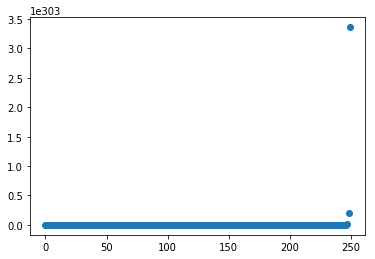

In [139]:
# Plot the cost at each iteration of gradient descent
# INSERT CODE HERE

plt.scatter(iteration,cost_values)

In [140]:
def get_cost_matrix():
    w0_list = np.linspace(-7.7, 11.7, 100)
    w1_list = np.linspace(0, 32, 100)

    J = np.zeros((len(w0_list),len(w1_list)))
    for i in range(len(w0_list)):
        for j in range(len(w1_list)):
            w0 = w0_list[i]
            w1 = w1_list[j]
            ypred = predict(X, [w0, w1])
            J[i,j] = cost_function(ypred, y)
    w0ax, w1ax = np.meshgrid(w0_list, w1_list)
    return w0ax, w1ax, J
  
def plot_gradient_descent(w_values):
    # Plot the w values at each iteration
    plt.scatter(w_values[:,0], w_values[:,1], color='k', s=10)
    # Contour map of cost function
    w0ax, w1ax, J = get_cost_matrix() 
    CS = plt.contour(w0ax, w1ax, J, cmap='viridis')
    # Add labels to the contours
    plt.clabel(CS, inline=1, fontsize=10)

    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title('J(w)')
    plt.show()

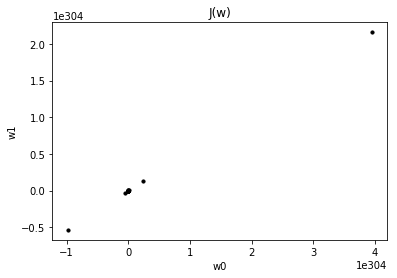

In [141]:
plot_gradient_descent(w_values)

## Optimizing gradient descent

The true value of $\mathbf{w}$ is `w = [2.7, 16.82365791084919]` where the cost is approximately `J=12.99`.

**Question: How could you get a better estimate of w? (Bonus: test your ideas!)**

### b. Cost as a function of $\mathbf{w}$

Below is some code that will plot the cost function $J$ as a function of $w_0$ and $w_1$, with the values of $\mathbf{w}$ evaluated at each iteration superimposed. 

You should be able to observe the values of $\mathbf{w}$ slowly moving towards the minimum value of $J$.

**Answer:**
    
    After 100 iterations it looks like we are still moving towards the minimum, and havent leveled out much yet.
    Running for 500 uterations shows that we level out around 250-300 iteration mark, so sould use 300 iterations for this
    
    The steps shown on the graph all look quite small, so we can probably safely increase Alpha to take larger steps.
    Playing around with this actually seems to show alpha of 1 gets us more or less straight to the minimum
    Going too big causes issues. At alpha = 2 this bounces about and diverges
    at alpha = 1.5 it seems to converge, but bounces about on the way